# MPPP
Need to predict price range of mobile phone.

Plan:
1. extract data and look at;
2. conduct EDA;
3. design and learn model;
4. make pipline and test it.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def mean_and_median(df, x, y):
    mean = []
    median = []
    for i in range(4):
        mean.append(np.mean(df.loc[df[x] == i, y]))
        median.append(np.median(df.loc[df[x] == i, y]))
    fig, ax = plt.subplots()
    ax.plot(range(4), mean, label='Mean')
    ax.plot(range(4), median, label='Median')
    fig.set_figwidth(20)
    fig.set_figheight(10)
    ax.set_ylabel(y)
    ax.legend()
    plt.show() 

## 1

In [3]:
add_train = r'' #write train data address

Columns description:
battery_power | Total energy a battery can store in one time measured in mAh; 
blue | Has bluetooth or not; 
clock_speed | speed at which microprocessor executes instructions; 
dual_sim | Has dual sim support or not; 
fc | Front Camera mega pixels; 
four_g | Has 4G or not; 
int_memory | Internal Memory in Gigabytes; 
m_dep | Mobile Depth in cm; 
mobile_wt | Weight of mobile phone; 
n_cores | Number of cores of processor; 
pc | Primary Camera mega pixels; 
px_height | Pixel Resolution Height; 
px_width | Pixel Resolution Width; 
ram | Random Access Memory in Mega Bytes; 
sc_h | Screen Height of mobile in cm; 
sc_w | Screen Width of mobile in cm; 
talk_time | longest time that a single battery charge will last when you are; 
three_g | Has 3G or not; 
touch_screen | Has touch screen or not; 
wifi | Has wifi or not;                    

price_range | This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost); 

In [4]:
df = pd.read_csv(add_train, header=0)
print(df.isin([0]).sum(), df.describe())
df.head()

battery_power       0
blue             1010
clock_speed         0
dual_sim          981
fc                474
four_g            957
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                101
px_height           2
px_width            0
ram                 0
sc_h                0
sc_w              180
talk_time           0
three_g           477
touch_screen      994
wifi              986
price_range       500
dtype: int64        battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%    

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


The data is complete and equal.
Need to look at the correlation between features.

## 2

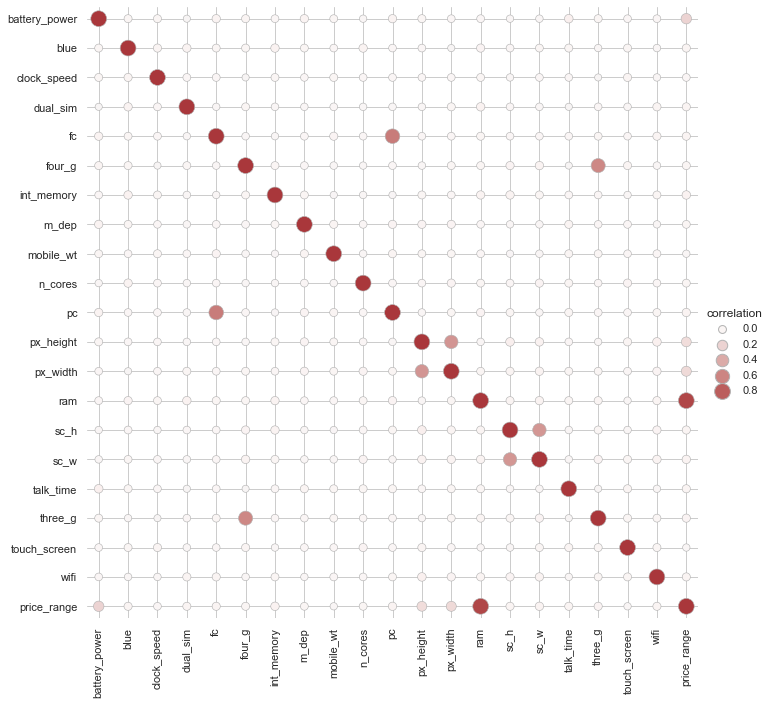

In [5]:
sns.set_theme(style='whitegrid')

corr = df.corr().stack().reset_index(name='correlation')
g = sns.relplot(
    data=corr,
    x='level_0', y='level_1', hue='correlation', size='correlation',
    palette='vlag', hue_norm=(-1, 1), edgecolor='.7',
    height=10, sizes=(50, 250), size_norm=(-.05, .8),)
g.set(xlabel='', ylabel='', aspect='equal')
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor('.7')

Many features don't correlate at target (price_range). 
There are ram/price_range, battery_power/price_range, px_height/px_width/price_range, sc_w/sc_h/price_range, pc/fc/price_range. 



It's worth looking at the distribution and shape of the data.

More about ram/price_range:

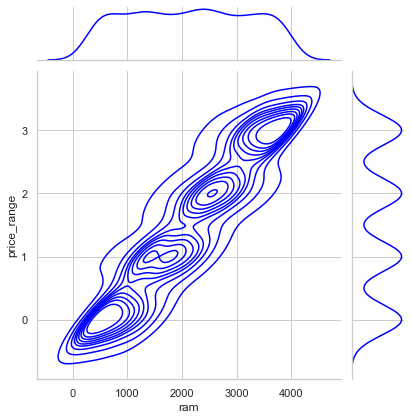

In [6]:
sns.jointplot(x='ram', y='price_range', data=df, color='blue', kind='kde')

<AxesSubplot:xlabel='price_range', ylabel='ram'>

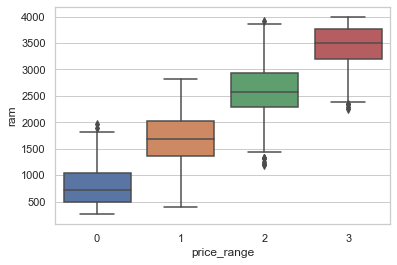

In [7]:
sns.boxplot(x='price_range', y='ram', data=df)

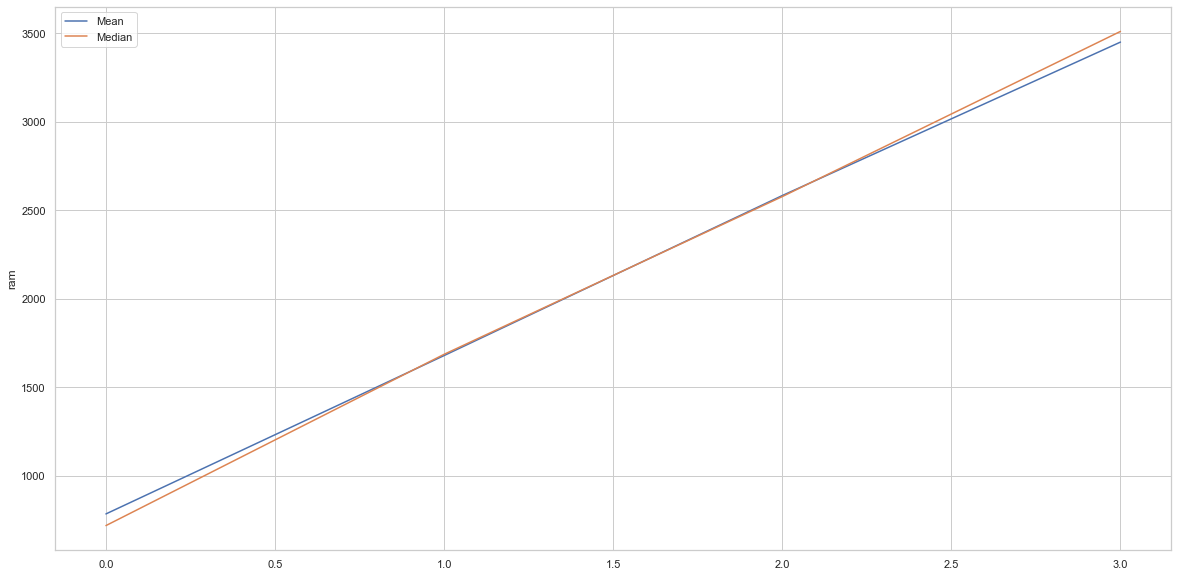

In [8]:
mean_and_median(df, 'price_range', 'ram')

battery_power/price_range:

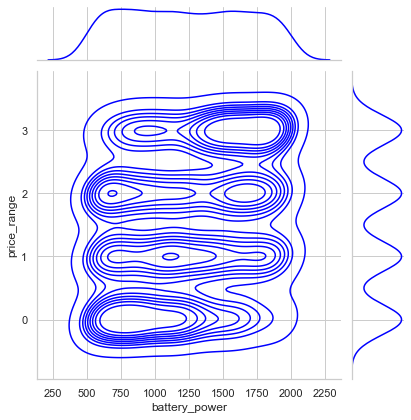

In [9]:
sns.jointplot(x='battery_power', y='price_range', data=df, color='blue', kind='kde')

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

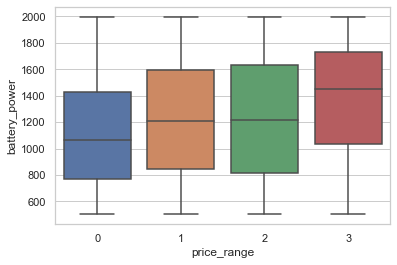

In [10]:
sns.boxplot(x='price_range', y='battery_power', data=df)

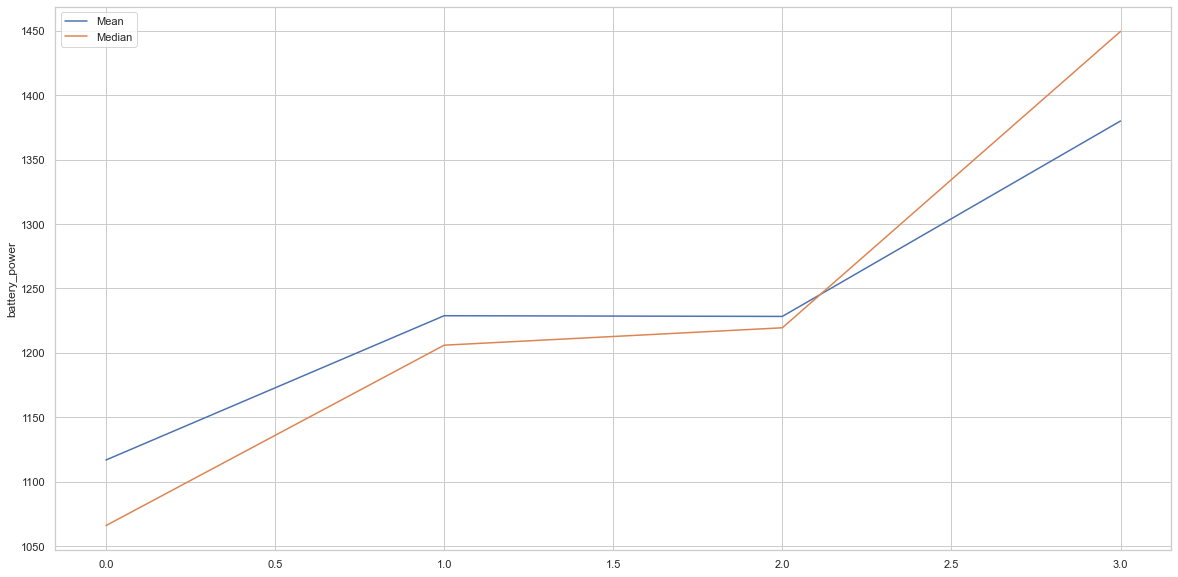

In [11]:
mean_and_median(df, 'price_range', 'battery_power')

px_height/px_width/price_range:

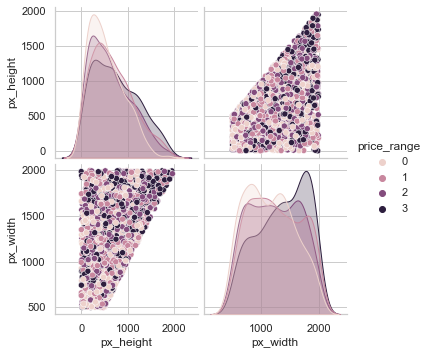

In [12]:
sns.pairplot(df[['px_height', 'px_width', 'price_range']], hue='price_range')

sc_w/sc_h/price_range:

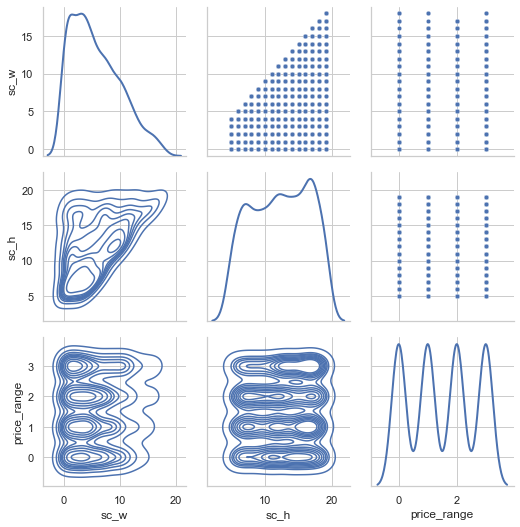

In [13]:
g = sns.PairGrid(df[['sc_w', 'sc_h', 'price_range']], diag_sharey=False)
g.map_upper(sns.scatterplot, s=20)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

pc/fc/price_range:

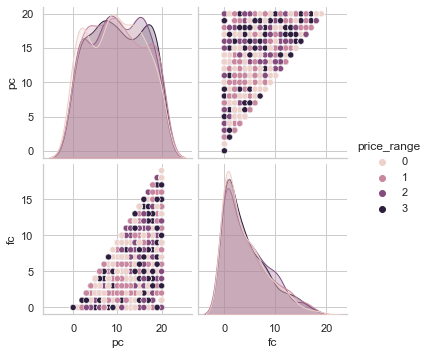

In [14]:
sns.pairplot(df[['pc', 'fc', 'price_range']], hue='price_range')

Since the dataframe has a simple relationship, no transformation is required.

## 3

Share data into X, Y, train and test datasets.


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df[['ram', 'battery_power', 'px_height', 'px_width', 'sc_w', 'sc_h']]
Y = df[['price_range']]
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.25)
train_y = np.ravel(train_y)
test_y = np.ravel(test_y)

Given the shape and dependencies between the data, take Logistic regression, KNN, SVM from sklearn and XGB Classifier from XGBoost. Choice based on comparison of accuracy of standard models.


In [17]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score, accuracy_score, roc_auc_score

Draw up the comparison process in the form of a graph.

Accuracy of LogisticRegression(solver='liblinear') is 0.77
Accuracy of XGBClassifier(objective='multi:softprob') is 0.89
Accuracy of KNeighborsClassifier() is 0.91
Accuracy of SVC() is 0.95


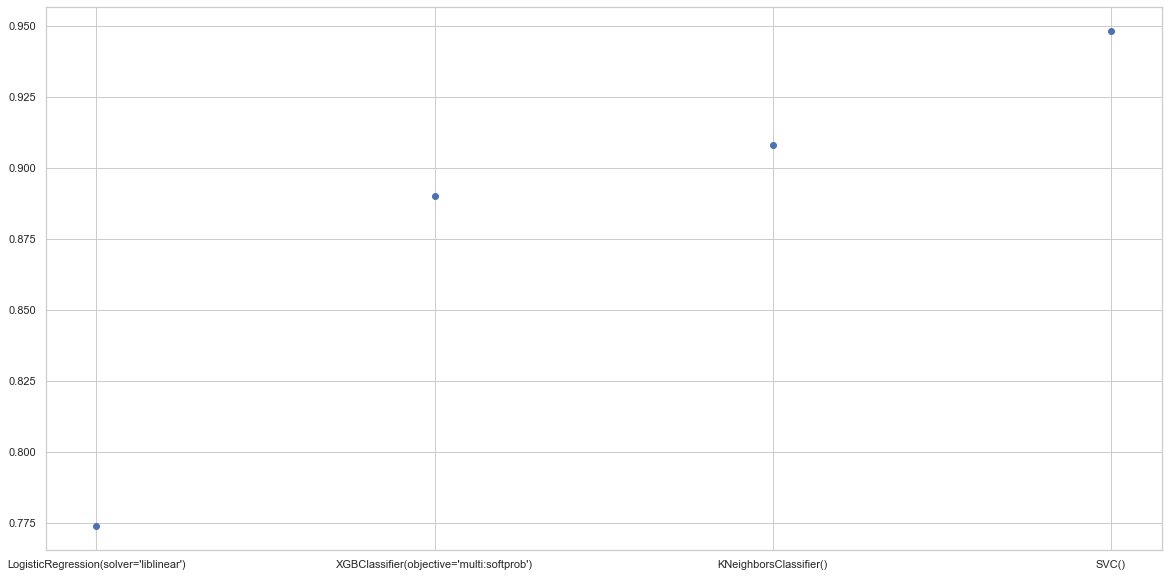

In [18]:
classifiers = [LogisticRegression(solver='liblinear'), XGBClassifier(), KNeighborsClassifier(), SVC()]
accs = []
fig, ax = plt.subplots()

for cls in classifiers:
    if cls != KNeighborsClassifier():
        cls.fit(train_x, train_y)
    pred_y = cls.predict(test_x)
    acc = accuracy_score(test_y, pred_y)
    accs.append(acc)
    print('Accuracy of %s is %s' % (str(cls), round(acc, 2)))
    
ax.scatter(range(len(accs)), accs)
plt.xticks(range(len(accs)), [str(s) for s in classifiers])
fig.set_figwidth(20)
fig.set_figheight(10)
plt.show()

Then search the best classifier (SVC) on grid and rate it.

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
gs = GridSearchCV(estimator=SVC(random_state=0), 
                  param_grid=[{'C': [1, 1.1, 1.2, 1.3, 1.4 ,1.5, 1.6, 1.7, 1.8, 1.9, 2],
                           'gamma': ['scale', 'auto']}],
                  scoring='f1_weighted',
                  n_jobs=-1,
                  cv=5,
                  verbose=2)
gs.fit(train_x, train_y)
best_params = gs.best_params_ 

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    6.1s finished


In [21]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score, accuracy_score, roc_auc_score

In [22]:
pred_y = gs.predict(test_x)

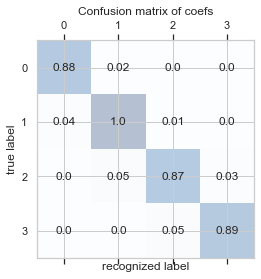

In [23]:
cmatrix = confusion_matrix(test_y, pred_y)
fig, ax = plt.subplots()
ax.matshow(cmatrix, cmap=plt.cm.Blues, alpha=0.3)
best_v = cmatrix.max()
for i in range(cmatrix.shape[0]):
    for j in range(cmatrix.shape[1]):
        ax.text(x=j, y=i, s=round(cmatrix[i, j]/best_v, 2), va='center', ha='center')
plt.xlabel('recognized label')
plt.ylabel('true label')
plt.title('Confusion matrix of coefs')
plt.show()

In [24]:
print('Recall is %s; F1 is %s; Precision is %s; Accuracy is %s' %
      (round(recall_score(test_y, pred_y, average='weighted'), 3), #average weighted by support
       round(f1_score(test_y, pred_y, average='weighted'), 3), 
       round(precision_score(test_y, pred_y, average='weighted'), 3),
       round(accuracy_score(test_y, pred_y), 3)))

Recall is 0.948; F1 is 0.948; Precision is 0.948; Accuracy is 0.948


The score is high enough to stop and make pipline.

In [25]:
import joblib #save model

In [26]:
joblib.dump(gs.best_estimator_, 'best_estimator.pkl', compress=1)

['best_estimator.pkl']

## 4

In [27]:
def CustomPipline(df): #pipline function
    X = df[['ram', 'battery_power', 'px_height', 'px_width', 'sc_w', 'sc_h']]
    cls = joblib.load('best_estimator.pkl')
    Y = cls.predict(X)
    return(Y) 